In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [24]:
df = pd.read_csv("IMDB Dataset 2.csv")

In [25]:
df["sentiment"] = df["sentiment"].replace("positive", 1)
df["sentiment"] = df["sentiment"].replace("negative", 0)

In [26]:
df["review"] = df["review"].str.replace("<br />", " ")

In [27]:
all_lengths = np.array([len(x.split()) for x in df["review"].values])
print("max length: ", max(all_lengths))
print("min length: ", min(all_lengths))
print("mean length: ", np.mean(all_lengths))

max length:  2459
min length:  4
mean length:  228.86876


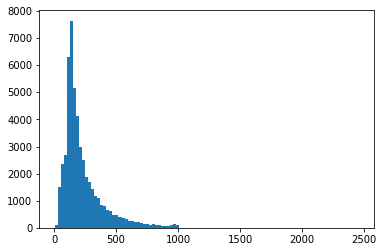

In [29]:
plt.hist(all_lengths, bins=100)
plt.show()


In [30]:
long_reviews_indices = np.where(all_lengths > 450)[0]
df = df.drop(long_reviews_indices, axis=0)


max length:  450
min length:  4
mean length:  184.18879350502428


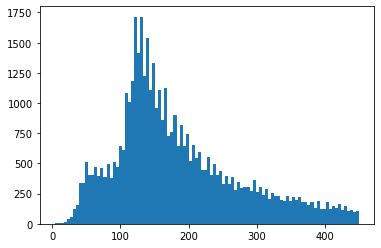

In [31]:
all_lengths = np.array([len(x.split()) for x in df["review"].values])
print("max length: ", max(all_lengths))
print("min length: ", min(all_lengths))
print("mean length: ", np.mean(all_lengths))
plt.hist(all_lengths, bins=100)
plt.show()

In [33]:
df["sentiment"].value_counts()


0    22717
1    22364
Name: sentiment, dtype: int64

In [34]:
text = df["review"].values
labels = df["sentiment"].values

In [35]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    text,
    labels,
    random_state=42,
    test_size=0.2,
    stratify=labels,
)


In [36]:
train_df = pd.DataFrame({"sentence": train_texts, "label": train_labels})
test_df = pd.DataFrame({"sentence": test_texts, "label": test_labels})

In [37]:
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)